# Travelling Salesman - Simulated Annealing


In [50]:
import math
import random
from matplotlib import pyplot as plt

# function to calculate the distance between two cities
def calculate_hypotenuse(cits, a, b):
    x1, y1 = cits[a]
    x2, y2 = cits[b]
    return math.sqrt( abs(x1-x2)**2 + abs(y1-y2) )

# function to calculate the length of the path
def calculate_distance(cits, path):
    l = len(path)
    total = 0
    for i in range(l):
        total += calculate_hypotenuse(cits, path[i], path[(i+1)%l])
    return total

# function generating a random initial path
def create_initial_random(cits):
    indices = list(range(len(cits)))
    random.shuffle(indices)
    return indices

# function generating the initial path using greedy algorithm
# always choosing the closest unvisited node
def create_initial_greedy(cits, start):
    path = [start]
    while len(path) < len(cits):
        current = path[-1]
        indices = [ind for ind in range(len(cits)) if ind not in path]
        smallest = float("inf")
        next = -1
        for ind in indices:
            if calculate_hypotenuse(cits, current, ind) < smallest:
                smallest = calculate_hypotenuse(cits, current, ind)
                next = ind
        path.append(next)
    return path

# path drawing function
def draw_path(cits, path):
    route = [cits[path[-1]]]
    for n in path:
        route.append(cits[n])
    x, y = zip(*route)
    plt.scatter(x, y, c="r")
    plt.plot(x, y)
    plt.suptitle(f"Distance = {calculate_distance(cits, path)}")
    plt.show()

# function calculating acceptance probability
def acceptance_probability(current, new, temp):
    if new < current:
        return 1
    else:
        return math.exp( (current-new)/temp )

# function that swaps two random nodes
def node_swapper(path):
    p = list(path)
    index1 = random.randrange(0, len(p))
    index2 = index1
    while index2 == index1:
        index2 = random.randrange(0, len(p))
    temp = p[index2]
    p[index2] = p[index1]
    p[index1] = temp
    return p

def simulated_annealing(cits, path, tmax, tmin, alpha):
    p = list(path)
    print(f"Running Simulated Annealing. Starting temperature = {tmax}, minimum temperature = {tmin}, alpha = {alpha}")
    print("Initial route:")
    draw_path(cits, p)
    current = calculate_distance(cits, p)
    dists = [current]
    temp = tmax
    while temp > tmin:
        new_p = node_swapper(p)
        new_p_dist = calculate_distance(cits, new_p)
        temp *= alpha
        if acceptance_probability(current, new_p_dist, temp) > random.random():
            p = list(new_p)
            current = calculate_distance(cits, p)
            dists.append(current)
    print("Final route:")
    draw_path(cits, p)
    plt.figure(figsize=(6, 5))
    plt.subplots_adjust(top=0.75)
    plt.plot(dists)
    plt.suptitle(f"Starting temperature = {tmax}\nMinimum temperature = {tmin}\nAlpha = {alpha}\nStarting distance = {dists[0]}\nFinal Distance = {dists[-1]}")
    plt.show()

### A map of 24 nodes

[(2.7933, 3.694), (2.6067, 4.4254), (2.86, 5.0373), (2.54, 6.2463), (3.1267, 6.4701), (3.7267, 6.8881), (4.4867, 7.4403), (5.5533, 7.4254), (6.3, 7.3955), (7.6333, 6.9179), (7.22, 6.3955), (6.6333, 5.8284), (7.0867, 5.1269), (7.4733, 4.4701), (7.18, 3.709), (6.6867, 2.8284), (6.2067, 2.0522), (5.54, 1.8731), (5.1533, 2.3358), (4.9667, 3.0075), (4.8867, 3.5448), (4.2733, 3.2313), (3.6333, 2.7537), (2.9933, 2.8433)]


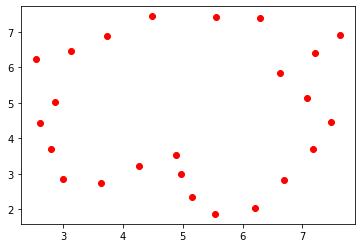

In [51]:
# converting the input matrix into a 2d list
with open("TSP Matrix3.csv") as input:
    cities = [tuple([float(n) for n in line.split(",")]) for line in input.read().splitlines()]

print(cities)

# * operator can be used in conjunction with zip() to unzip the list
x, y = zip(*cities)
plt.scatter(x, y, c="r")
plt.show()

Optimal Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Optimal Path distance: 22.077328545028728


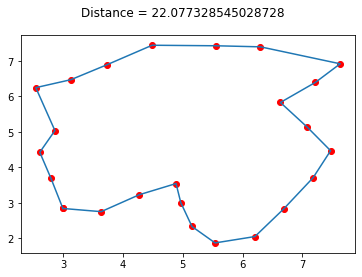

Initial Greedy Path: [3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 10, 9]
Initial Greedy Path distance: 29.44310136779931


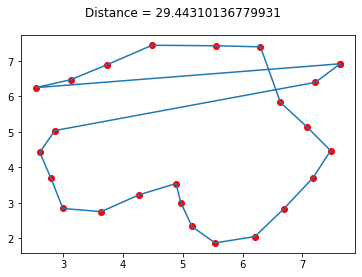

Initial Random Path: [4, 5, 13, 22, 11, 3, 19, 8, 15, 2, 12, 17, 7, 14, 10, 6, 21, 1, 9, 16, 20, 23, 0, 18]
Initial Random Path distance: 66.71276141236469


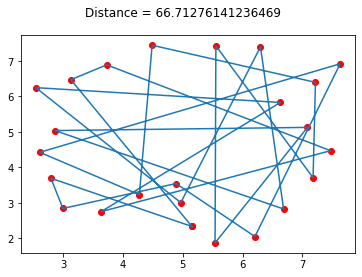

In [65]:
optimal = list(range(len(cities)))
print("Optimal Path:", optimal)
print("Optimal Path distance:", calculate_distance(cities, optimal))
draw_path(cities, optimal)

initial_greedy = create_initial_greedy(cities, random.randrange(len(cities)))
print("Initial Greedy Path:", initial_greedy)
print("Initial Greedy Path distance:", calculate_distance(cities, initial_greedy))
draw_path(cities, initial_greedy)

initial_random = create_initial_random(cities)
print("Initial Random Path:", initial_random)
print("Initial Random Path distance:", calculate_distance(cities, initial_random))
draw_path(cities, initial_random)

Running Simulated Annealing. Starting temperature = 35, minimum temperature = 0.0005, alpha = 0.999
Initial route:


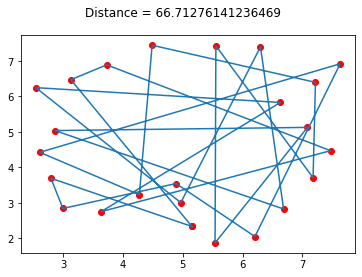

Final route:


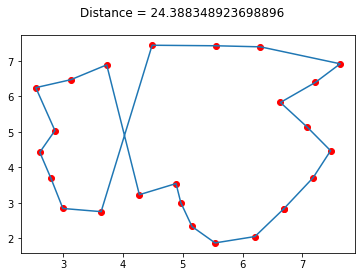

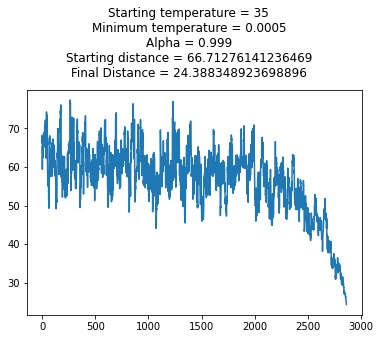

In [66]:
simulated_annealing(cities, initial_random, 35, 0.0005, 0.999)

Running Simulated Annealing. Starting temperature = 0.2, minimum temperature = 0.0005, alpha = 0.999
Initial route:


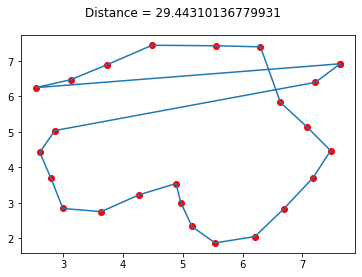

Final route:


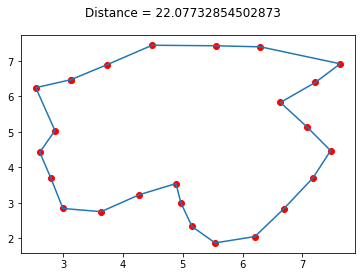

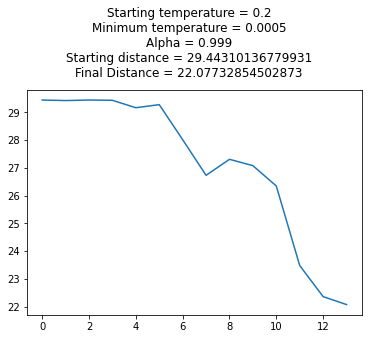

In [68]:
simulated_annealing(cities, initial_greedy, 0.2, 0.0005, 0.999)

### A random map of 100 nodes

[(1.47, 1.326), (8.027, 4.823), (3.22, 5.546), (1.084, 4.82), (2.883, 3.303), (3.468, 6.918), (3.648, 4.032), (2.86, 2.894), (4.987, 2.519), (8.065, 6.431), (0.268, 9.79), (1.435, 9.394), (5.356, 1.097), (1.547, 0.858), (4.64, 5.465), (6.624, 7.535), (7.254, 4.838), (0.295, 1.128), (5.354, 2.953), (3.591, 2.463), (5.873, 6.5), (7.129, 1.685), (1.537, 4.987), (3.676, 1.431), (9.017, 6.683), (6.107, 6.289), (5.455, 3.723), (2.808, 1.622), (0.403, 7.939), (1.104, 8.05), (7.654, 9.938), (1.09, 5.158), (7.334, 4.18), (6.732, 9.872), (7.254, 8.11), (2.382, 8.95), (5.696, 4.914), (8.012, 7.567), (3.927, 8.669), (7.23, 7.363), (5.147, 6.704), (6.509, 3.854), (1.036, 3.862), (9.603, 1.833), (4.631, 2.489), (6.293, 7.683), (0.25, 1.637), (3.246, 0.044), (8.561, 3.091), (9.355, 7.864), (0.851, 4.695), (2.154, 4.651), (7.434, 7.489), (4.835, 7.057), (3.087, 7.252), (4.862, 0.483), (1.656, 9.979), (4.884, 5.337), (7.421, 6.151), (8.677, 8.975), (0.841, 1.618), (7.517, 9.484), (6.335, 8.275), (1.634

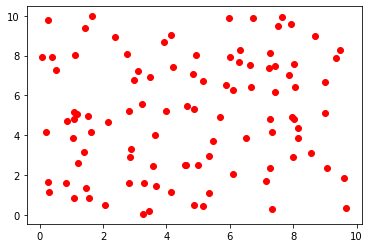

In [55]:
rand_cities = []

for i in range(100):
    a = round(random.uniform(0, 10), 3)
    b = round(random.uniform(0, 10), 3)
    rand_cities.append((a, b))
    

print(rand_cities)

# * operator can be used in conjunction with zip() to unzip the list
x, y = zip(*rand_cities)
plt.scatter(x, y, c="r")
plt.show()

Initial Greedy Path: [88, 1, 73, 84, 48, 98, 67, 21, 64, 83, 18, 8, 44, 85, 19, 68, 27, 23, 78, 55, 71, 12, 26, 41, 32, 16, 58, 9, 72, 37, 52, 39, 15, 45, 79, 62, 34, 61, 86, 30, 33, 69, 77, 53, 40, 20, 25, 81, 36, 57, 14, 93, 2, 82, 51, 22, 95, 31, 3, 50, 42, 63, 76, 99, 60, 46, 17, 94, 13, 0, 74, 47, 90, 7, 4, 6, 5, 75, 54, 80, 35, 11, 56, 10, 28, 89, 97, 29, 92, 38, 91, 87, 59, 70, 49, 24, 66, 65, 43, 96]
Initial Greedy Path distance: 98.83370514068403


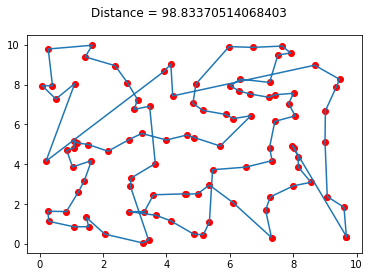

Initial Random Path: [70, 60, 24, 75, 71, 57, 65, 20, 25, 14, 19, 43, 86, 94, 64, 61, 79, 36, 66, 0, 28, 30, 8, 13, 21, 42, 9, 80, 16, 10, 5, 81, 83, 31, 47, 12, 29, 85, 51, 74, 82, 48, 84, 37, 88, 11, 17, 52, 6, 73, 67, 90, 99, 18, 49, 45, 41, 58, 68, 26, 2, 33, 93, 69, 1, 3, 35, 59, 95, 87, 78, 97, 92, 44, 62, 98, 39, 91, 46, 32, 23, 54, 96, 89, 77, 27, 22, 50, 76, 72, 38, 40, 15, 53, 7, 63, 56, 34, 55, 4]
Initial Random Path distance: 399.39493252887553


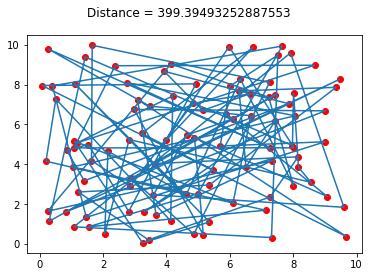

In [56]:
initial_greedy = create_initial_greedy(rand_cities, random.randrange(len(rand_cities)))
print("Initial Greedy Path:", initial_greedy)
print("Initial Greedy Path distance:", calculate_distance(rand_cities, initial_greedy))
draw_path(rand_cities, initial_greedy)

initial_random = create_initial_random(rand_cities)
print("Initial Random Path:", initial_random)
print("Initial Random Path distance:", calculate_distance(rand_cities, initial_random))
draw_path(rand_cities, initial_random)

Running Simulated Annealing. Starting temperature = 20, minimum temperature = 0.0005, alpha = 0.999
Initial route:


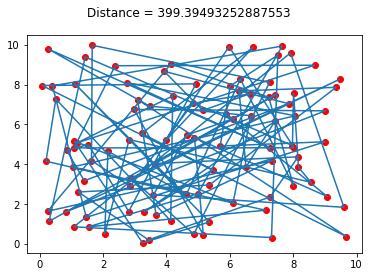

Final route:


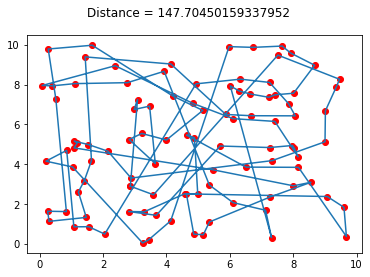

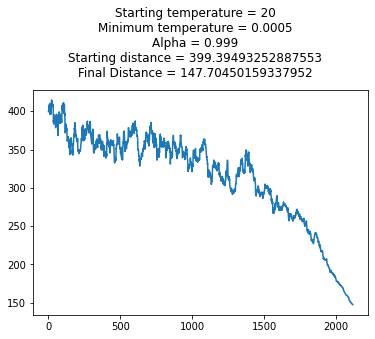

In [57]:
simulated_annealing(rand_cities, initial_random, 20, 0.0005, 0.999)

Running Simulated Annealing. Starting temperature = 0.3, minimum temperature = 0.0001, alpha = 0.9999
Initial route:


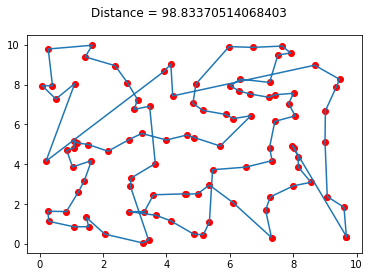

Final route:


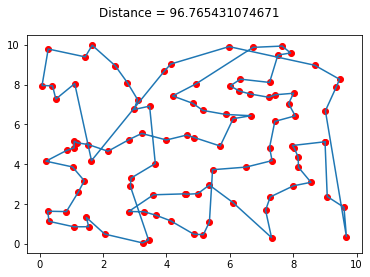

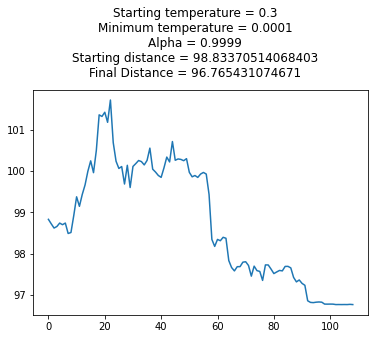

In [61]:
simulated_annealing(rand_cities, initial_greedy, 0.3, 0.0001, 0.9999)